# Statistical Parameter Estimation 2024
## Exercise 5

Author: Alex Karonen

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1.
Consider the linear regression model
$y_k = \theta_1 + \theta_2 t_k + \epsilon_k$, 

where $\epsilon_k \sim N(0,\sigma^2)$ and prior of $\textbf(\theta) = (\theta_1, \theta_2)^T$ is Gaussian with known mean and covariance $\sim N(m_0, P_0)$ (fig 3.1)

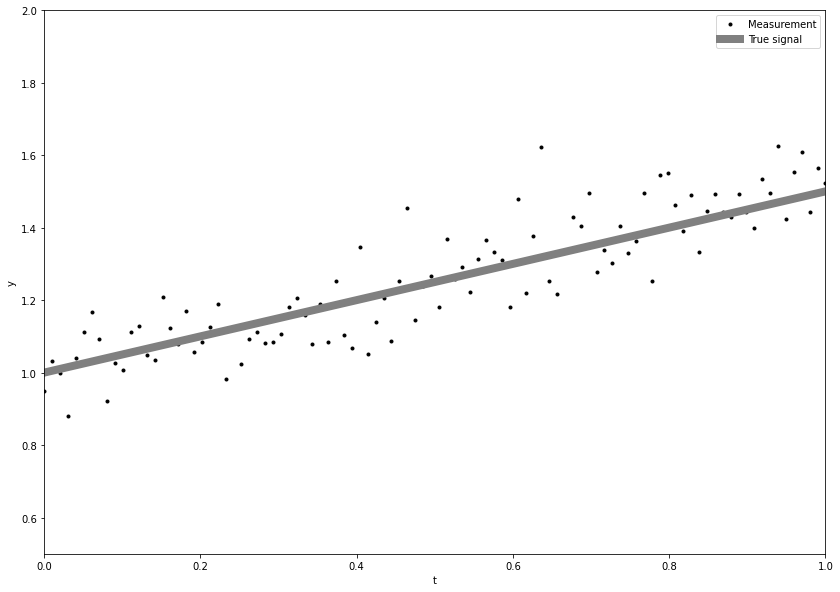

In [21]:
# Create the measurement data

tk = np.linspace(0,1,100)

# True signal (y = 1/2*t+1)

y_true = 1/2*tk+1

# Noise N(0,sigma^2)
sigma = 0.3
eps_k = np.random.normal(loc=0, scale=sigma**2, size=tk.shape)

# Measurements

yk = y_true + eps_k

# Visualize the measurement against the true signal

plt.figure(figsize=(14,10))
plt.plot(tk, yk, 'k.', label="Measurement")
plt.plot(tk, y_true, lw=8, c="gray", label="True signal")
plt.xlim([0,1])
plt.ylim((0.5, 2))
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

### Task 2.

Batch linear regression (fig 3.2)

Mean and covariance:

$$  
    \begin{split}
    \textbf{m}_T &= \textbf{P}_T^{-1}+\frac{1}{\sigma^2}\textbf{H}^T\textbf{H}\frac{1}{\sigma^2}\textbf{H}^T\textbf{y}+\textbf{P}_T^{-1}\textbf{m}_{T-1}\\
    \textbf{P}_T &= \textbf{P}_{T-1}^{-1}+\frac{1}{\sigma^2}\textbf{H}^T\textbf{H}
    \end{split},
$$
where $\textbf{t}_T = (t_1, t_2, t_3,... ,t_{k=T})^T$, $\textbf{H} = (\textbf{1}~ \textbf{t}_T)$ and $\textbf{y} = (y_1, y_2, y_3,... ,y_{k=T})$

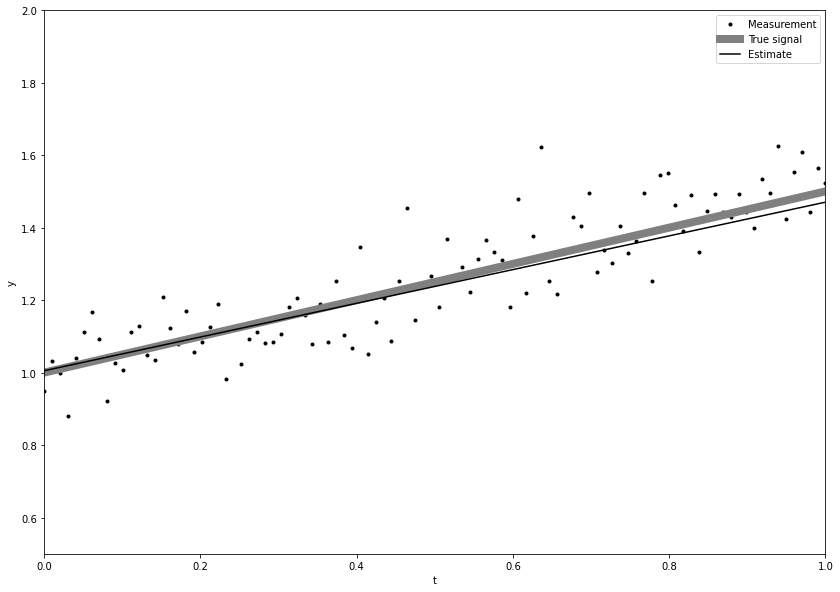

In [38]:
# Initial mean and covariance (guess)
mT = np.zeros(2)
PT = np.eye(len(mT))
BATCH_SIZE = 5
for T in range(0,len(tk), BATCH_SIZE):
    tT = tk[T : T + BATCH_SIZE]
    y = yk[T:T+BATCH_SIZE]
    H = np.vstack((np.ones_like(tT), tT)).T

    mT = (np.linalg.inv(np.linalg.inv(PT) + 1 / sigma**2 * H.T @ H) @ 
                    (1 / sigma**2 * H.T @ y + np.linalg.inv(PT)@mT))
    PT = np.linalg.inv(np.linalg.inv(PT) + 1 / sigma**2 * H.T @ H)


theta_est = np.random.multivariate_normal(mean=mT, cov=PT)
y_pred = theta_est[0]+theta_est[1]*tk
# Visualize the regression model

plt.figure(figsize=(14, 10))
plt.plot(tk, yk, "k.", label="Measurement")
plt.plot(tk, y_true, lw=8, c="gray", label="True signal")
plt.plot(tk, y_pred, 'k', label="Estimate")
plt.xlim([0, 1])
plt.ylim((0.5, 2))
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

### Task 3.

Gaussian random walk (fig 6.1)

Formula:

$$
    \begin{split}
    x_k &= x_{k-1} + q \\
    y_k &= x_k + r,
    \end{split}
$$
where $q \sim N(0,Q)$ and $r \sim N(0,R)$

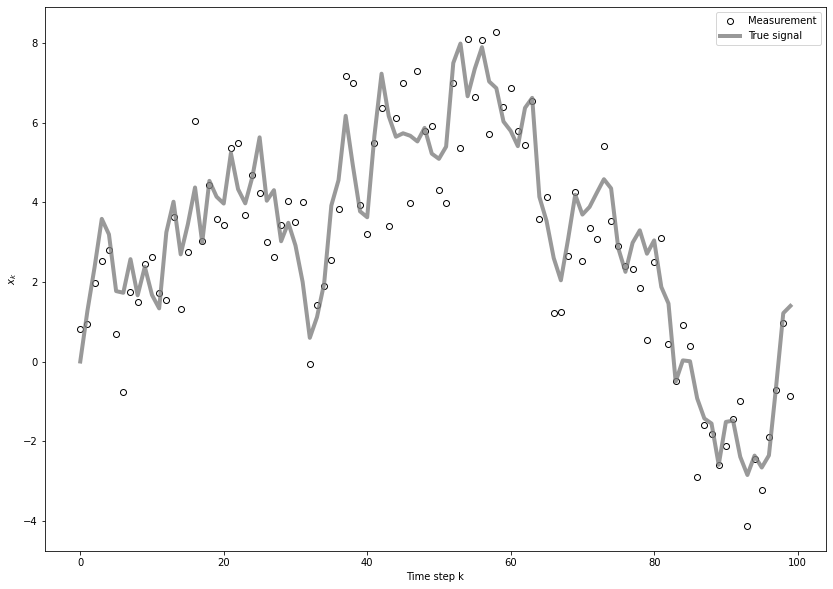

In [40]:
Q = R = 1


xk = np.empty((100))

yk = np.empty_like(xk)
xk[0] = 0

yk[0] = xk[0] + np.random.normal(0,R)

for k in range(1,len(xk)):

    xk[k] = xk[k-1] + np.random.normal(0,Q)

    yk[k] = xk[k] + np.random.normal(0, R)


plt.figure(figsize=(14, 10))

plt.plot(yk, "ko", mfc="white", label="Measurement")

plt.plot(xk, lw=4, alpha=0.8, c="gray", label="True signal")

plt.xlabel("Time step k")

plt.ylabel("$x_k$")

plt.legend()

plt.show()